In [1]:
#!pip install opencv-python

In [2]:
import cv2
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

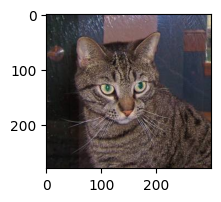

In [3]:
plt.figure(figsize=(4, 2))
imagedata = plt.imread("./cat.1.jpg")
plt.imshow(imagedata)
plt.grid(False)
plt.show()

In [4]:
print("Yes")

Yes


In [5]:
imagedata.shape[2]

3

In [6]:
print("Image Shape: {}".format(imagedata.shape))
print("Image Size is : Image Height: {},  Image Width: {} and Image Channle: {} = {}".format(imagedata.shape[0], imagedata.shape[1], imagedata.shape[2], imagedata.size))

Image Shape: (280, 300, 3)
Image Size is : Image Height: 280,  Image Width: 300 and Image Channle: 3 = 252000


In [7]:
def catimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

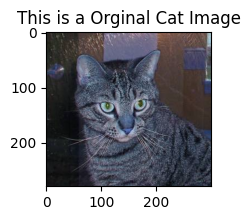

In [8]:
catimageShow("This is a Orginal Cat Image", imagedata)

In [9]:
imagedata.shape[:2]

(280, 300)

In [10]:
#mask Lider, Data Fusion
Image_mask = np.zeros(imagedata.shape[:2], dtype="uint8")

In [11]:
Image_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
cv2.rectangle(Image_mask, (0, 450), (50, 200), 255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0,   0]], dtype=uint8)

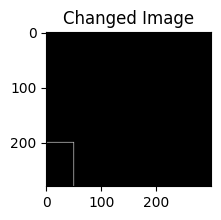

In [13]:
catimageShow("Changed Image", Image_mask)

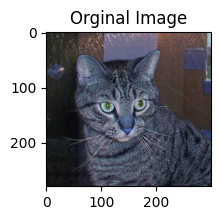

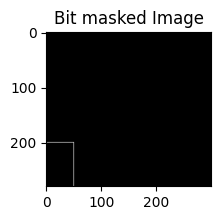

In [14]:
argmumentImage = {"Image":"./cat.1.jpg", 
                 "scharr":0}
imagedata = plt.imread(argmumentImage["Image"])
catimageShow("Orginal Image", imagedata)
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
catimageShow("Bit masked Image", Image_mask)

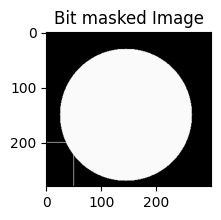

In [15]:
cv2.circle(Image_mask, (145, 150), 120, 250, -1)
bit_mask = cv2.bitwise_and(imagedata, imagedata, mask = Image_mask)
catimageShow("Bit masked Image", Image_mask)

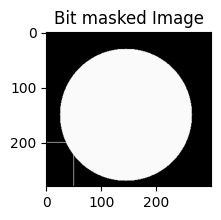

In [16]:
cv2.circle(Image_mask, (145, 150), 120, 250, -1)
bit_mask = cv2.bitwise_or(imagedata, imagedata, mask = Image_mask)
catimageShow("Bit masked Image", Image_mask)

In [17]:
max(imagedata[0][0])

44

In [18]:
# Image Scalling
# Normalization
# Standarization
imagedata/255

array([[[0.15294118, 0.17254902, 0.15686275],
        [0.15294118, 0.17254902, 0.15686275],
        [0.15686275, 0.17254902, 0.16862745],
        ...,
        [0.81176471, 0.8       , 0.67843137],
        [0.79215686, 0.78039216, 0.65098039],
        [0.78823529, 0.77647059, 0.63921569]],

       [[0.15686275, 0.17647059, 0.16078431],
        [0.15686275, 0.17647059, 0.16078431],
        [0.15686275, 0.17254902, 0.16862745],
        ...,
        [0.79607843, 0.78431373, 0.6627451 ],
        [0.78039216, 0.76862745, 0.63921569],
        [0.77254902, 0.76078431, 0.62352941]],

       [[0.15686275, 0.17647059, 0.16078431],
        [0.15686275, 0.17647059, 0.16078431],
        [0.15686275, 0.17254902, 0.16862745],
        ...,
        [0.78039216, 0.76470588, 0.65098039],
        [0.78039216, 0.76078431, 0.64313725],
        [0.78039216, 0.76078431, 0.63529412]],

       ...,

       [[0.1254902 , 0.11764706, 0.12156863],
        [0.11764706, 0.10980392, 0.11372549],
        [0.10196078, 0

In [19]:
customValueW = 120.0/imagedata.shape[1]

In [20]:
customValueH = 120.0/imagedata.shape[0]

In [21]:
120*120

14400

In [22]:
customValueW

0.4

In [23]:
imagedata.shape[0]

280

In [24]:
280*0.4

112.0

In [25]:
imageDimention = (120, int(imagedata.shape[0]*customValueW))

In [26]:
imagedata.shape

(280, 300, 3)

In [27]:
imageDimention

(120, 112)

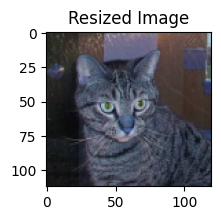

In [28]:
newImage = cv2.resize(imagedata, imageDimention, interpolation = cv2.INTER_AREA)
catimageShow("Resized Image", newImage)

In [29]:
newImage.shape

(112, 120, 3)

In [30]:
(imageH, ImageW) = imagedata.shape[:2]

In [31]:
centerX, centerY = (imageH//2, ImageW//2)

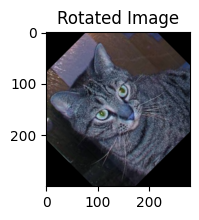

In [32]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 45, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, ImageW))
catimageShow("Rotated Image", rotateNow)

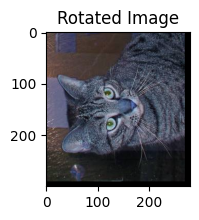

In [33]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 90, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, ImageW))
catimageShow("Rotated Image", rotateNow)

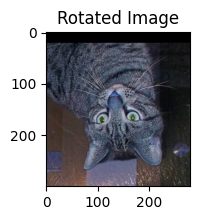

In [34]:
imageRotate = cv2.getRotationMatrix2D((centerX, centerY), 180, 1.0)
rotateNow = cv2.warpAffine(imagedata, imageRotate, (imageH, ImageW))
catimageShow("Rotated Image", rotateNow)

In [35]:
#Step 01: Convert iMages to Gray
grayimage = cv2.cvtColor(imagedata, cv2.COLOR_RGB2GRAY)

In [36]:
grayimage.shape

(280, 300)

In [37]:
kernelGen = -1 if argmumentImage["scharr"] > 0 else 3 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


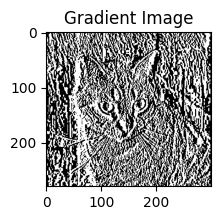

In [38]:
gradienImageDataX = cv2.Sobel(grayimage, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = kernelGen)
gradienImageDataY = cv2.Sobel(grayimage, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = kernelGen)
catimageShow("Gradient Image", gradienImageDataX)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


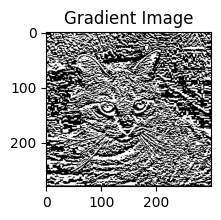

In [39]:
catimageShow("Gradient Image", gradienImageDataY)

In [40]:
gradienImageDataX

array([[  0.,   2.,   6., ..., -36., -24.,   0.],
       [  0.,   1.,   4., ..., -29., -19.,   0.],
       [  0.,  -1.,   0., ...,  -9.,  -1.,   0.],
       ...,
       [  0., -22., -27., ...,   4.,  71.,   0.],
       [  0., -25., -31., ...,  -5.,  44.,   0.],
       [  0., -26., -32., ..., -26.,  12.,   0.]], dtype=float32)

In [41]:
gradienImageDataY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  4.,   3.,   0., ..., -31., -19., -14.],
       [ -6.,  -7., -10., ..., -23.,   3.,  16.],
       ...,
       [ 12.,  10.,   5., ...,   2.,  19.,  24.],
       [ -2.,  -3.,  -5., ...,  53.,   0., -32.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)